In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [53]:
dia=pd.read_csv("/content/global_food_wastage_dataset 1.csv")
dia.head()

,Country,Year,Food Category,Total Waste (Tons)
0,Australia,2019,Fruits & Vegetables,19268.63
1,Indonesia,2019,Prepared Food,3916.97
2,Germany,2022,Dairy Products,9700.16
3,France,2023,Fruits & Vegetables,46299.69
4,France,2023,Beverages,33096.57


In [54]:
dia.isnull().sum()

,0
Country,0
Year,0
Food Category,0
Total Waste (Tons),0


In [55]:
from sklearn.preprocessing import LabelEncoder

le_country = LabelEncoder()
le_food = LabelEncoder()

dia['Country'] = le_country.fit_transform(dia['Country'])
dia['Food Category'] = le_food.fit_transform(dia['Food Category'])


In [56]:
dia.head()


,Country,Year,Food Category,Total Waste (Tons)
0,1,2019,4,19268.63
1,8,2019,7,3916.97
2,6,2022,2,9700.16
3,5,2023,4,46299.69
4,5,2023,1,33096.57


In [57]:
ind=dia[['Country','Year','Food Category']]
dep=dia['Total Waste (Tons)']

In [58]:


Log = LinearRegression()
Log.fit(ind, dep)

LinearRegression()

In [59]:
dia['Country'] = le_country.inverse_transform(dia['Country'])
dia['Food Category'] = le_food.inverse_transform(dia['Food Category'])



In [60]:
country_input = int(input("Enter the country's encoded ID (e.g., 1 for Australia, 5 for France): "))
year_input = int(input("Enter the Year: "))
food_category = int(input("Enter the Food Category's encoded ID (e.g., 4 for Fruits & Vegetables): "))

pred = Log.predict([[country_input, year_input, food_category]])
print(f"Predicted Total Waste (Tons): {pred[0]:.2f}")

Enter the country's encoded ID (e.g., 1 for Australia, 5 for France): 5
Enter the Year: 2010
Enter the Food Category's encoded ID (e.g., 4 for Fruits & Vegetables): 2
Predicted Total Waste (Tons): 24911.21


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


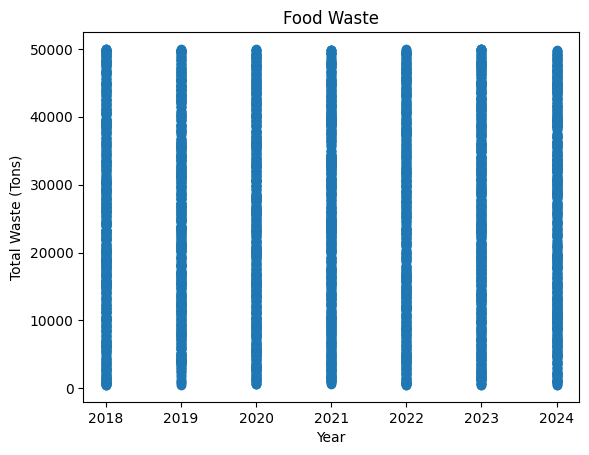

In [63]:
plt.scatter(ind['Year'], dep)
plt.xlabel("Year")
plt.ylabel("Total Waste (Tons)")
plt.title("Food Waste")

plt.show()